<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/Credit_Card_Fraud_Detection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-12-05 05:59:05--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-12-05 05:59:05 (74.0 MB/s) - ‘helper_functions.py’ saved [10247/10247]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, walk_through_dir,calculate_results

In [4]:
unzip_data("/content/archive (7).zip")

In [5]:
data  = pd.read_csv("/content/creditcard_2023.csv")

In [6]:
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [9]:
data.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
data["Class"].value_counts()

,count
Class,
0,284315
1,284315


In [12]:
data.Class.unique()

array([0, 1])

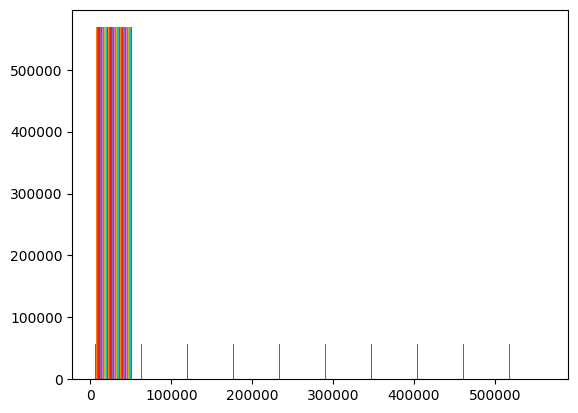

In [13]:
import matplotlib.pyplot as plt

plt.hist(data)
plt.show()

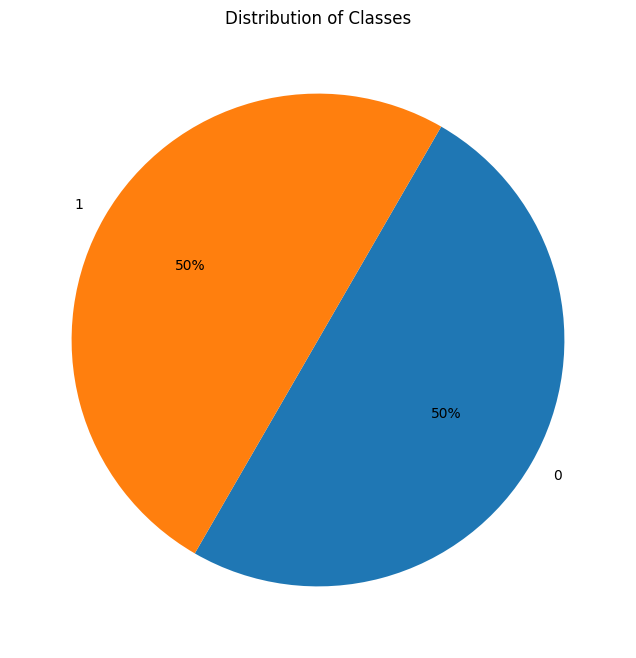

In [14]:
import matplotlib.pyplot as plt

# Assuming 'Class' column exists in the DataFrame and contains categorical data
class_counts = data['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.0f%%',
    startangle=240
)
plt.title('Distribution of Classes')
plt.show()


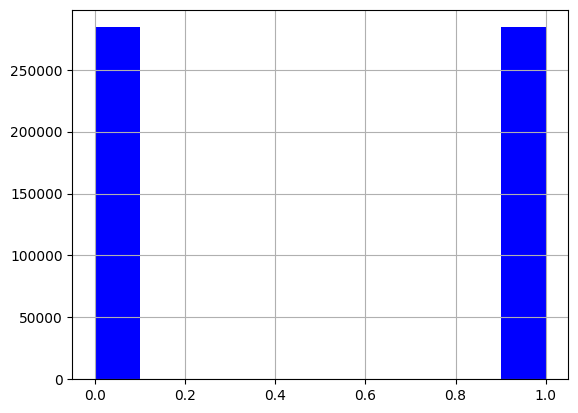

In [15]:
plt.hist(data["Class"], color ="blue", bins=10)
plt.grid(True)
plt.show()

In [16]:
x = data.drop(columns=["Class"])
y = data["Class"]

In [17]:
x

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [18]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
568625,1
568626,1
568627,1
568628,1


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test =train_test_split(x , y, test_size=0.3 , shuffle=True, random_state=42)

In [21]:
X_train

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
400282,400282,-0.363223,0.663551,-0.744452,1.254839,-0.040747,-0.511713,-0.556703,0.079769,-0.870520,...,0.639771,0.309951,0.439658,-0.397237,-0.795695,-0.052595,0.313695,0.659813,0.029500,14545.27
439696,439696,0.365635,-0.005367,-0.096653,0.353750,-0.186671,-0.258307,-0.170350,-0.028947,-0.176576,...,0.164321,0.063773,-0.014859,-0.115594,0.917145,0.945081,0.761912,0.483889,0.634776,4385.61
175832,175832,-0.211985,-0.811944,0.485130,0.434157,1.803325,-0.066885,0.406729,-0.114204,0.031242,...,0.070429,0.091557,0.797416,0.728314,1.337360,-2.450779,-0.923252,0.051270,0.873582,7384.92
251646,251646,0.025550,-0.288214,1.597869,-0.420011,0.221625,0.842837,0.568994,-0.096953,0.624953,...,-0.042604,-0.039059,0.316322,0.069351,0.892595,-0.760222,-1.884455,0.004224,0.382780,13521.92
112160,112160,-0.160379,-0.597804,2.953146,0.084842,-0.009268,1.125643,0.297598,-0.028493,1.072541,...,0.272598,-0.056601,0.464498,0.066064,0.290821,0.639777,-0.023464,-0.159843,-0.044691,10735.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,110268,0.801394,-0.816327,0.940860,-1.307453,-0.230994,0.075694,0.244866,-0.139237,1.758674,...,0.010923,-0.002396,0.584551,-0.227596,1.335762,0.530426,0.174842,-0.220402,-0.009268,22404.20
259178,259178,-0.094106,-0.396178,0.074629,-1.323275,1.240080,2.411076,0.286226,0.176478,0.752125,...,-0.470184,-0.088351,-0.061028,0.224966,1.474007,-2.553339,-1.994806,-0.161470,0.230890,5736.76
365838,365838,-0.986032,-0.241328,-0.805454,0.965279,-0.219016,-1.266523,-1.079518,0.414023,-0.870494,...,-0.139560,0.338603,0.119022,-1.152134,-0.766088,-0.706450,-0.358638,2.010951,0.814228,18943.99
131932,131932,0.136515,-0.130872,1.506084,-0.414279,0.398608,-0.013919,0.872089,-0.239818,0.220758,...,-0.155681,-0.082135,0.290838,-0.313113,0.854173,0.306760,-0.967220,-0.372687,-0.575555,6836.59


In [22]:
X_test

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
437378,437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,...,0.235116,0.134969,0.070433,0.047770,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18
504222,504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,...,0.332143,0.192405,0.289441,-0.255187,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55
4794,4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,...,0.110696,-0.271739,-0.404654,-0.121235,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87
388411,388411,-0.855315,0.137014,-0.628116,0.613733,-0.643573,-0.664283,-0.880040,0.466586,-1.045508,...,0.552311,0.405505,0.167560,0.446262,-0.205976,0.492582,0.658619,1.609128,-0.025592,19282.98
424512,424512,0.257686,0.035247,-0.203112,0.506745,-0.242235,-0.192608,-0.289297,0.044488,-0.396122,...,0.124330,0.162191,0.165912,-0.181999,0.331451,1.043095,0.029799,0.643273,0.736723,19114.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22891,22891,0.657051,-1.181474,1.220127,-0.721422,-0.328776,0.921978,0.061371,-0.050961,0.722150,...,0.288258,0.017003,0.501029,-0.264462,0.175602,0.277786,-0.288405,-0.197963,0.028811,472.79
5690,5690,-0.347794,-0.053629,0.743861,0.504422,0.248813,0.510118,0.243776,0.037772,0.229418,...,-0.331837,-0.026266,0.447543,-0.389270,-0.102001,-1.081198,0.460407,-0.452872,-0.346530,22100.38
477545,477545,-1.300909,0.940878,-1.385593,1.878092,-1.608295,-0.495198,-1.583317,0.517516,-1.623142,...,-0.247797,0.183717,0.203418,0.717917,0.669755,-1.666287,-0.291521,1.383212,-1.085898,22585.49
455511,455511,-1.878508,1.748743,-2.102463,2.349670,-1.660418,-1.040652,-2.094882,0.053781,-1.923387,...,0.812284,-1.132158,0.978392,1.188305,-1.697701,-0.280521,1.364537,3.043785,-3.549678,8507.78


In [23]:
y_train

,Class
400282,1
439696,1
175832,0
251646,0
112160,0
...,...
110268,0
259178,0
365838,1
131932,0


In [24]:
y_test

,Class
437378,1
504222,1
4794,0
388411,1
424512,1
...,...
22891,0
5690,0
477545,1
455511,1


In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398041, 30) (170589, 30) (398041,) (170589,)


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [28]:
model.score(X_train, y_train)

0.9975228682472409

In [ ]:
model.score(X_test, y_test)

0.9977372515226656

In [29]:
y_predict = model.predict(X_test)

In [30]:
y_predict

array([1, 1, 0, ..., 1, 1, 1])

In [31]:
acc = model.score(X_test, y_test)
acc

0.997578976370106

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [33]:
print(accuracy_score(y_test, y_predict))

0.997578976370106


In [34]:
from sklearn.svm import SVC
model_2 = SVC()

In [35]:
model_2.fit(X_train, y_train)

SVC()

In [36]:
model_2.score(X_train, y_train)

0.9990402998686065

In [37]:
model_2.score(X_test, y_test)

0.9991675899383899

In [38]:
y_pred_2 = model_2.predict(X_test)

In [39]:
print(accuracy_score(y_test, y_pred_2))

0.9991675899383899


In [41]:
import seaborn as sns

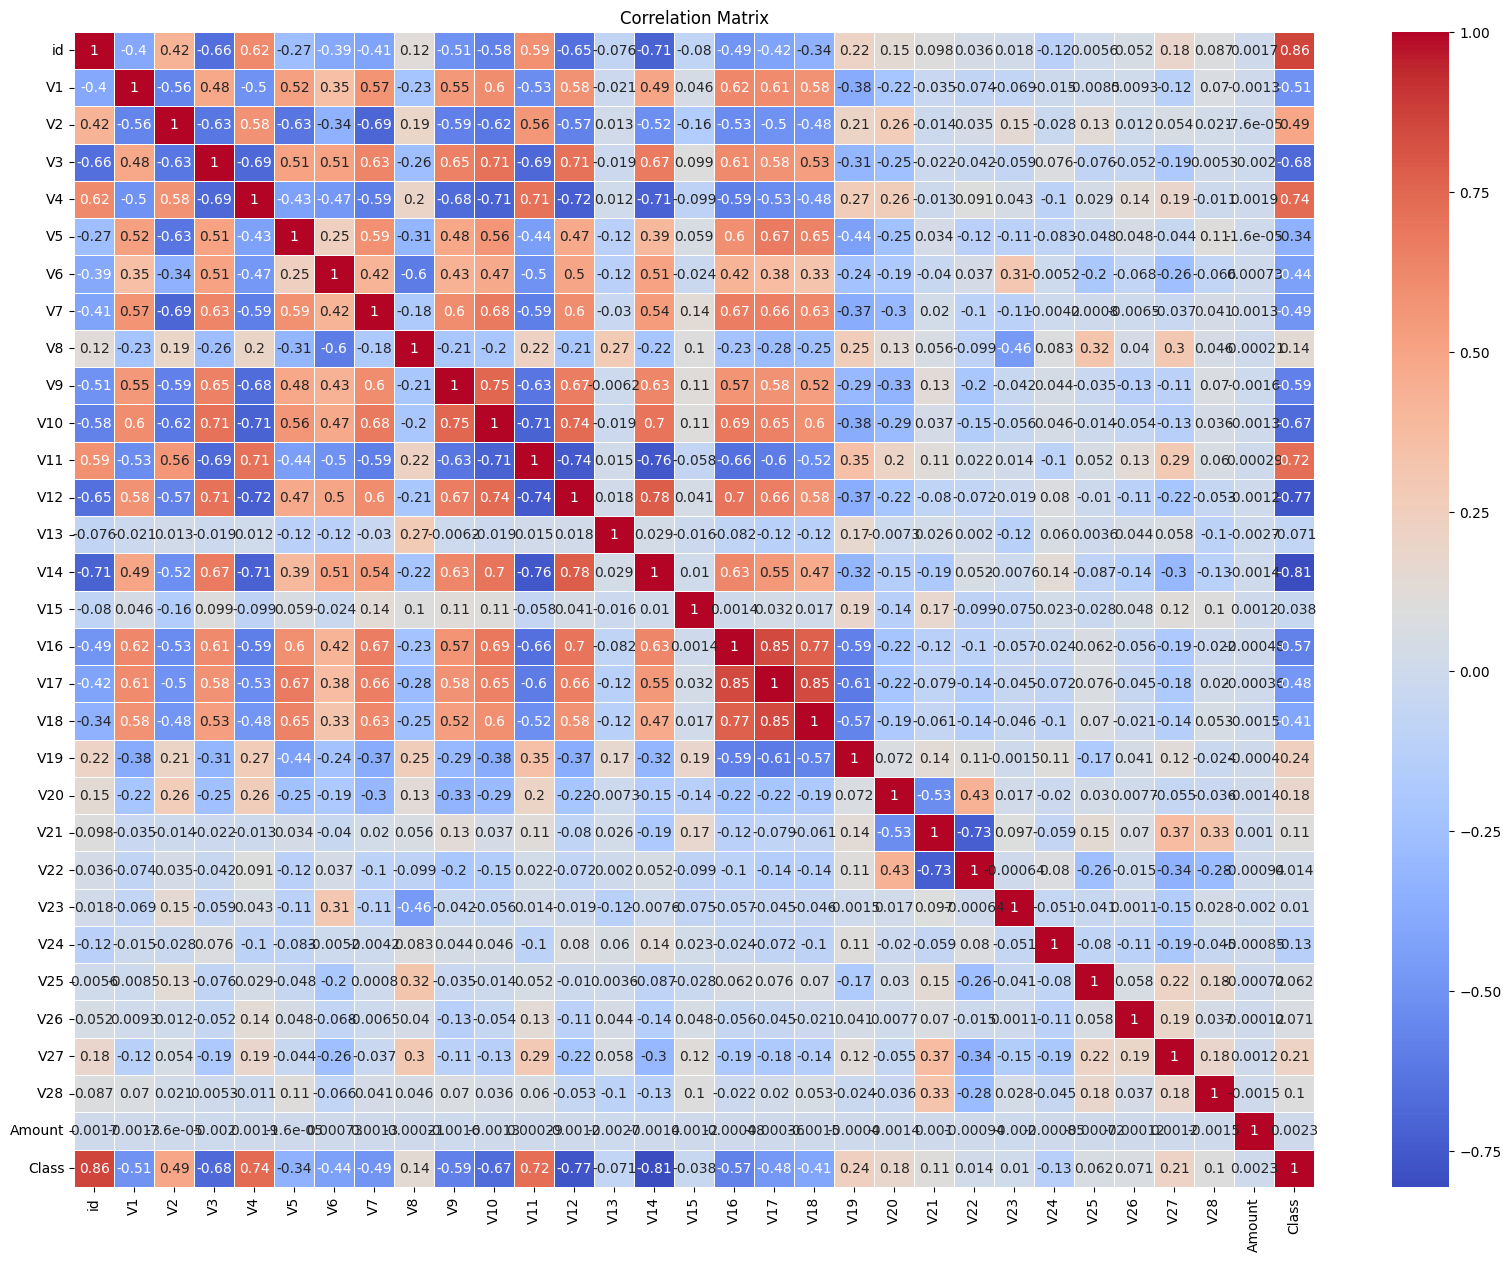

In [42]:
correlation_matrix = data.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title("Correlation Matrix")
plt.show()